In [343]:
#!/usr/bin/env python3

import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [355]:
def read_position(file):
    x = []
    y = []
    z = []
    d = []
    reader = csv.reader(open(file))
    data = [row for row in reader]

    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2 + float(row[3])**2)
        d.append(float(a))
    return x, y, z, d
        
def read_position_noZ(file):
    x = []
    y = []
    d = []
    reader = csv.reader(open(file))
    data = [row for row in reader]

    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        a = np.sqrt(float(row[1])**2 + float(row[2])**2)
        d.append(float(a))
    return x, y, d

In [356]:
file1_paths = ['./csv_1/0_1.csv.converted.csv', 
              './csv_1/0_2.csv.converted.csv', 
              './csv_1/0_3.csv.converted.csv', 
             './csv_1/1_2.csv.converted.csv', 
             './csv_1/1_3.csv.converted.csv', 
             './csv_1/2_3.csv.converted.csv']

file2_paths = ['./csv_2/0_1.csv.converted.csv', 
              './csv_2/0_2.csv.converted.csv', 
              './csv_2/0_3.csv.converted.csv', 
             './csv_2/1_2.csv.converted.csv', 
             './csv_2/1_3.csv.converted.csv', 
             './csv_2/2_3.csv.converted.csv']

In [358]:
def graph1(file_path):
    
    x, y, z, d = read_position(file_path)


    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    print('--------------------')
    for ax, col, data, name in zip(axes.ravel(), 
                                        ['orange','r','b','g'], 
                                        [d,x,y,z], 
                                        ['D','X','Y','Z']):
        lmax = len(data)
        ax.set_title(name)
        ax.plot(data, '.', color=col)
        ax.hlines([np.mean(data)], 0, lmax, "black",label='mean')
        ax.legend()
        print(f"{name}",'[mean/ error/ std]=',
              '{:.03f}'.format(np.mean(data)), 
              '[m]/', '{:.05f}'.format(abs(max(data)) - np.mean(data)), 
              '[m]/', '{:.05f}'.format(np.std(data)),'[m]')

In [359]:
def output1(files):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag)
        output_graph(file)
        plt.show()

0_1
--------------------
D [mean/ error/ std]= 4.883 [m]/ 0.00984 [m]/ 0.00683 [m]
X [mean/ error/ std]= 4.691 [m]/ 0.02920 [m]/ 0.01082 [m]
Y [mean/ error/ std]= 1.256 [m]/ 0.02249 [m]/ 0.00884 [m]
Z [mean/ error/ std]= 0.512 [m]/ 0.12595 [m]/ 0.08245 [m]


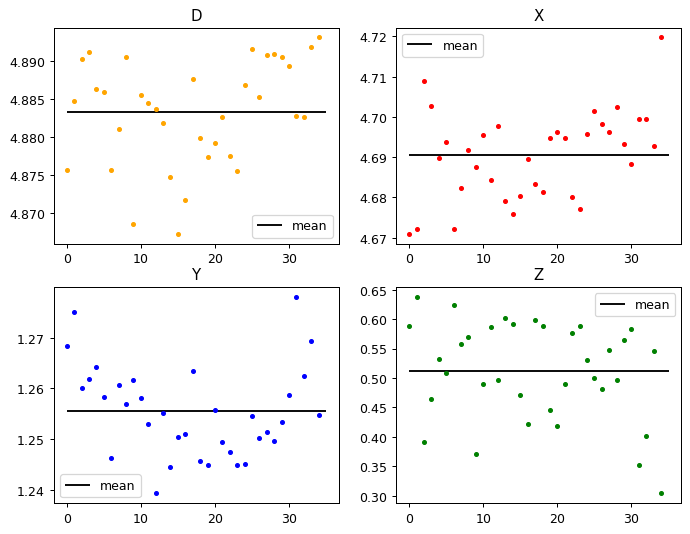

0_2
--------------------
D [mean/ error/ std]= 9.735 [m]/ 0.02033 [m]/ 0.01097 [m]
X [mean/ error/ std]= 9.377 [m]/ 0.04051 [m]/ 0.01521 [m]
Y [mean/ error/ std]= 2.538 [m]/ 0.04491 [m]/ 0.01497 [m]
Z [mean/ error/ std]= 0.624 [m]/ 0.20572 [m]/ 0.13543 [m]


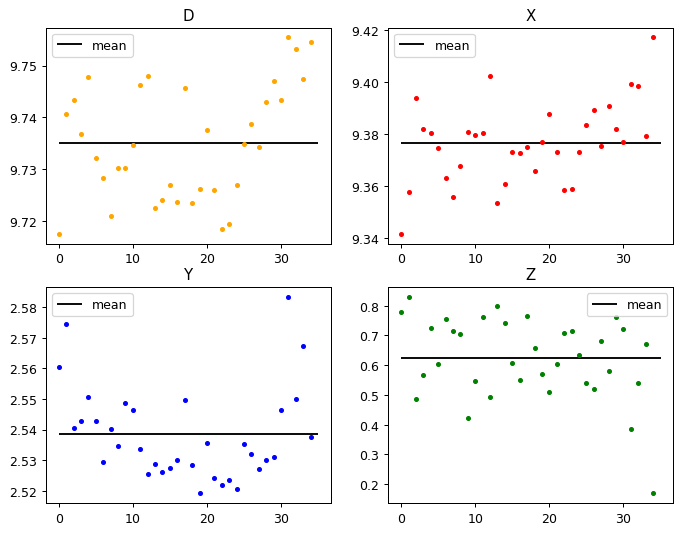

0_3
--------------------
D [mean/ error/ std]= 14.665 [m]/ 0.02792 [m]/ 0.01467 [m]
X [mean/ error/ std]= 14.075 [m]/ 0.02834 [m]/ 0.01580 [m]
Y [mean/ error/ std]= 4.081 [m]/ 0.02116 [m]/ 0.01278 [m]
Z [mean/ error/ std]= 0.551 [m]/ 0.21176 [m]/ 0.14259 [m]


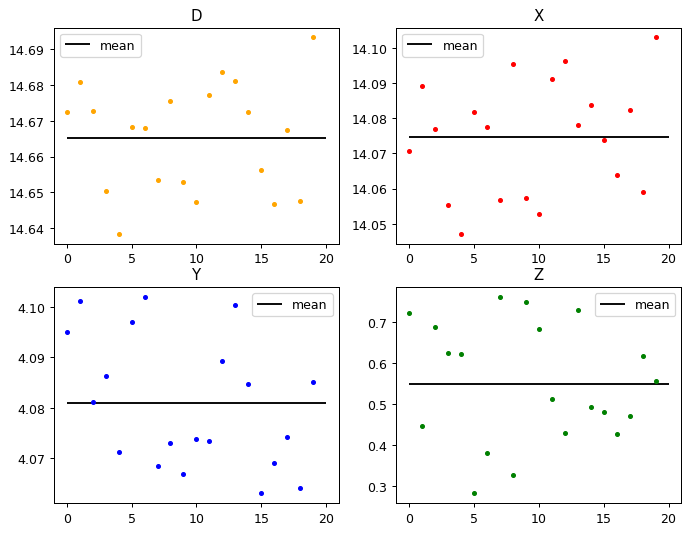

1_2
--------------------
D [mean/ error/ std]= 4.803 [m]/ 0.08750 [m]/ 0.06198 [m]
X [mean/ error/ std]= 4.612 [m]/ 0.10497 [m]/ 0.07326 [m]
Y [mean/ error/ std]= 1.296 [m]/ 0.03066 [m]/ 0.01573 [m]
Z [mean/ error/ std]= 0.303 [m]/ 0.94051 [m]/ 0.17040 [m]


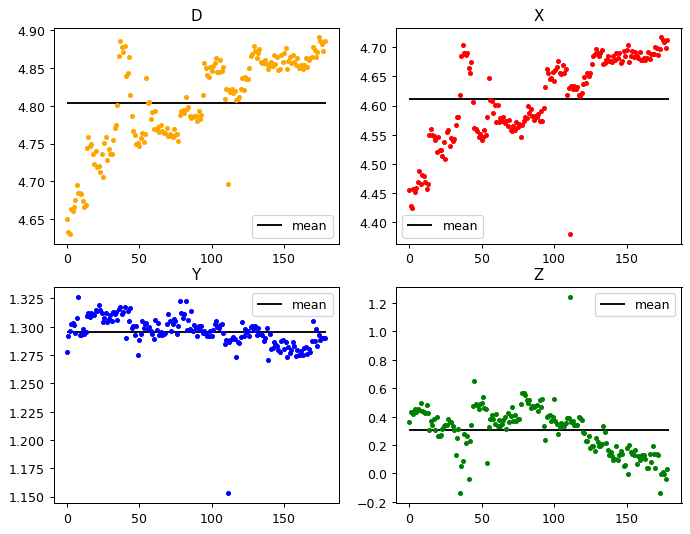

1_3
--------------------
D [mean/ error/ std]= 9.657 [m]/ 0.18747 [m]/ 0.12178 [m]
X [mean/ error/ std]= 9.202 [m]/ 0.22354 [m]/ 0.14143 [m]
Y [mean/ error/ std]= 2.859 [m]/ 0.06361 [m]/ 0.02756 [m]
Z [mean/ error/ std]= 0.553 [m]/ 0.87315 [m]/ 0.30098 [m]


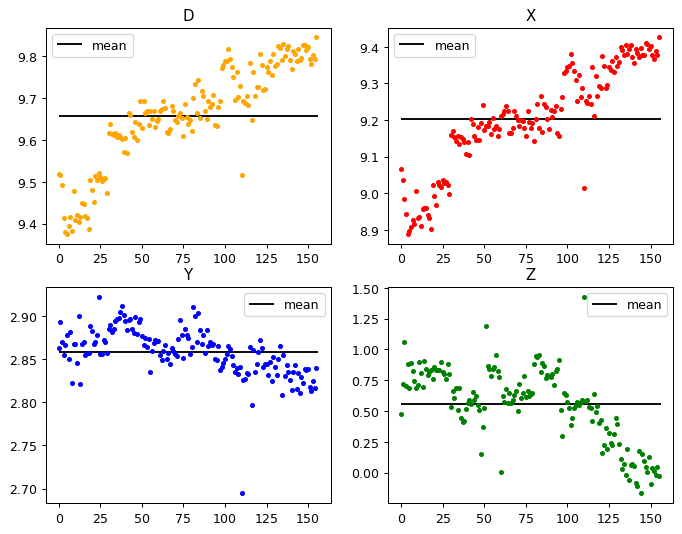

2_3
--------------------
D [mean/ error/ std]= 4.887 [m]/ 0.11029 [m]/ 0.04948 [m]
X [mean/ error/ std]= 4.621 [m]/ 0.12361 [m]/ 0.05760 [m]
Y [mean/ error/ std]= 1.566 [m]/ 0.03027 [m]/ 0.01499 [m]
Z [mean/ error/ std]= 0.222 [m]/ 0.39605 [m]/ 0.17133 [m]


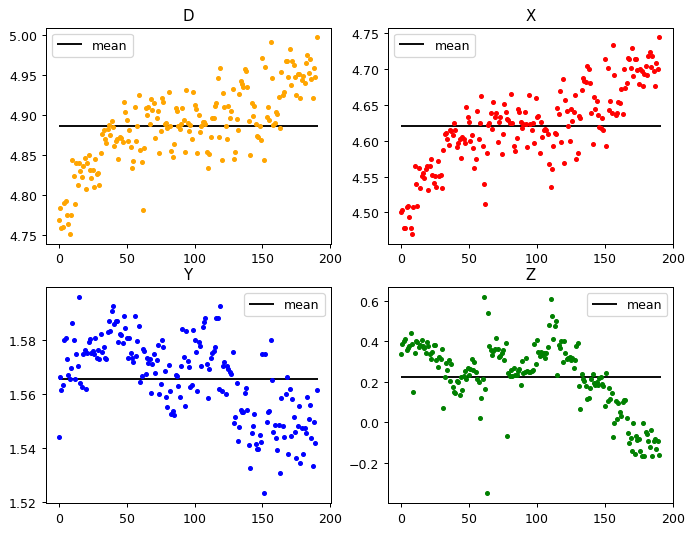

In [361]:
output1(file2_paths)

In [362]:
def graph2(file_path, ylim):
    x, y, z, d = read_position(file_path)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_z = np.mean(z)
    mean_d = np.mean(d)
    
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    
    for ax, col, data, mean, name in zip(axes.ravel(), 
                                        ['orange','r','b','g'], 
                                        [d,x,y,z],
                                        [mean_d,mean_x,mean_y,mean_z],
                                        ['D*','X*','Y*','Z*']):
        lmax = len(data)
        ax.set_title(name)
        ax.set_ylim(-ylim, ylim)
        ax.axes.xaxis.set_visible(False)
        ax.plot(data-mean, '.', color=col)
        ax.hlines([0], 0, lmax, "black")
        

def output2(files,lim):
    for file, tag in zip(files, ['0_1','0_2','0_3','1_2','1_3','2_3']):
        print(tag)
        graph2(file,lim)
        plt.show()

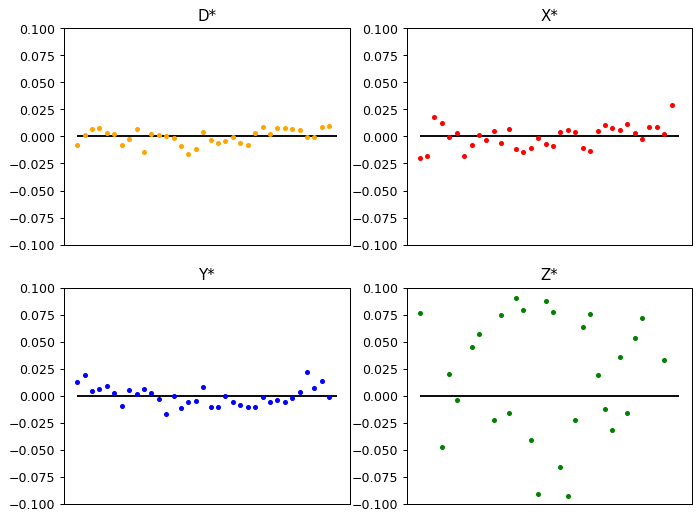

In [363]:
graph2(file2_paths[0],0.1)

0_1


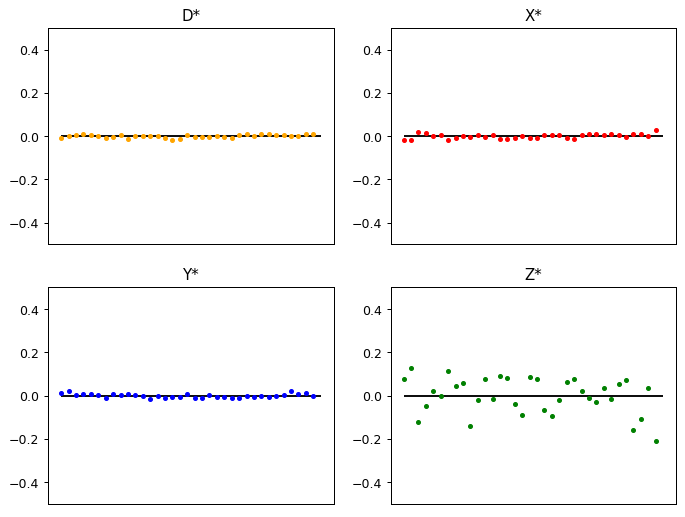

0_2


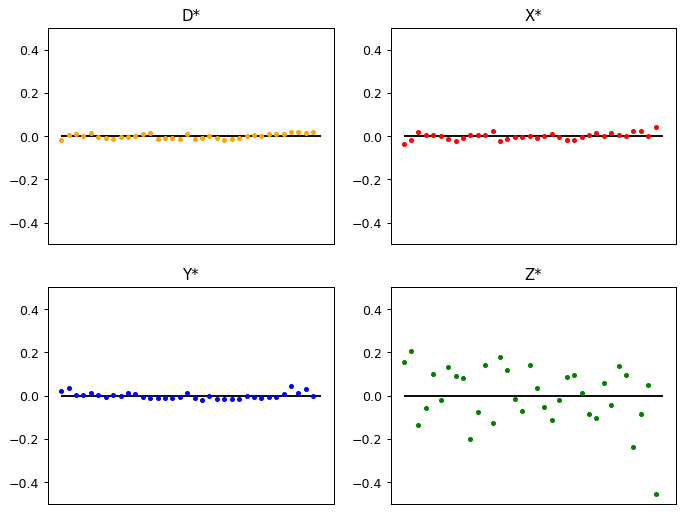

0_3


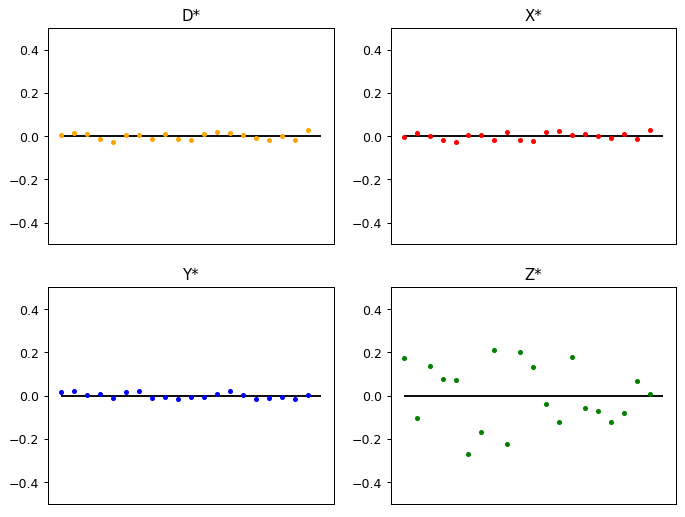

1_2


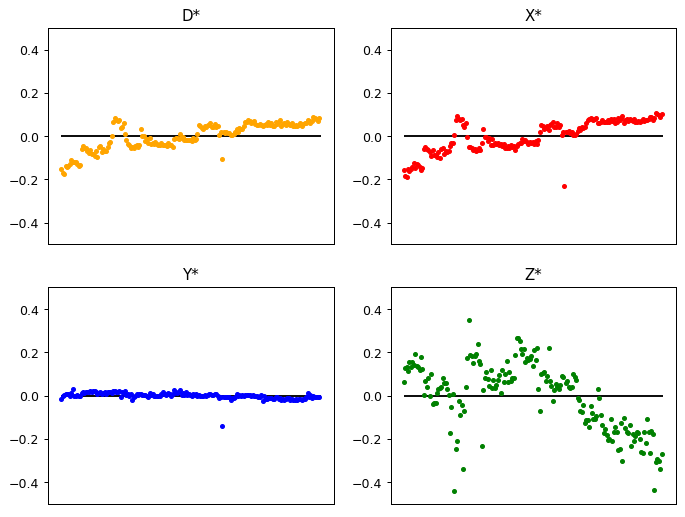

1_3


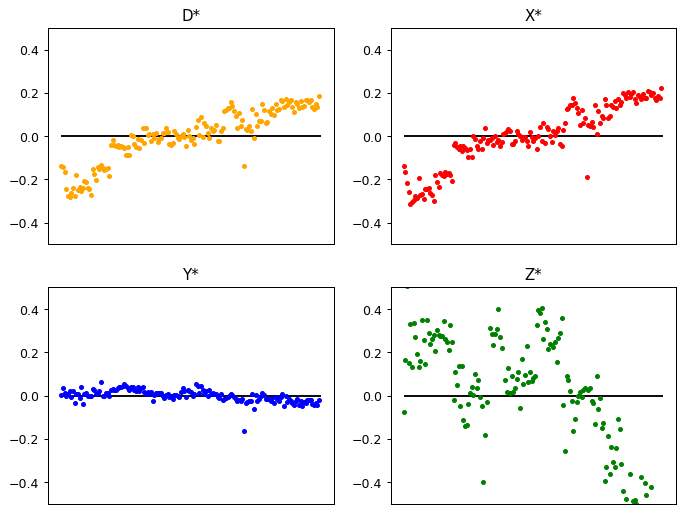

2_3


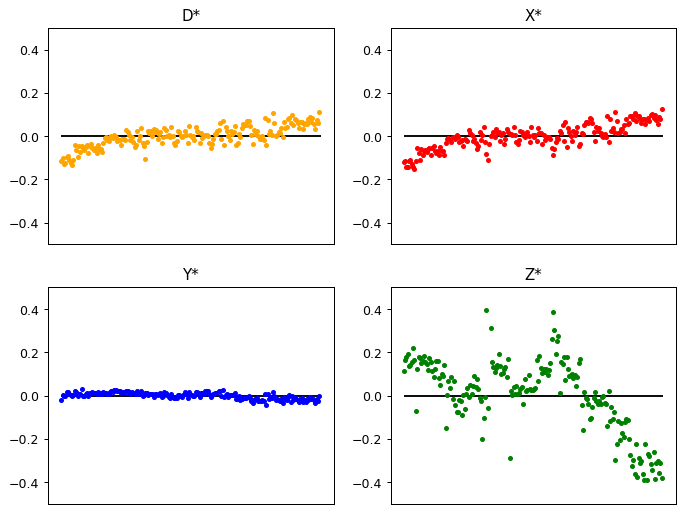

In [328]:
graphs2(file2_paths,0.5)

0_1


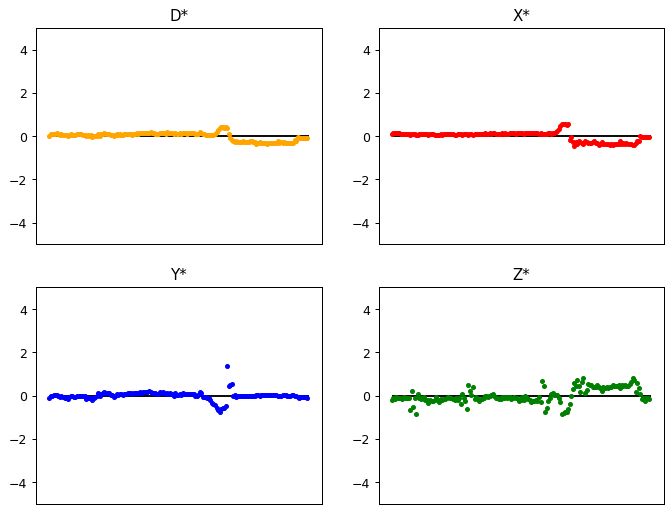

0_2


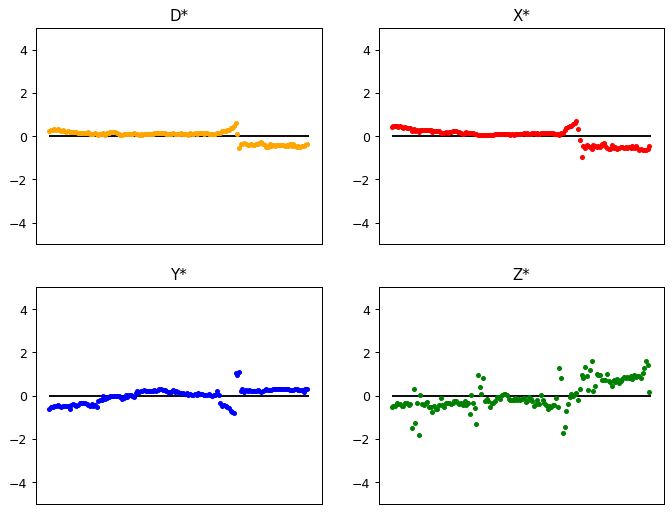

0_3


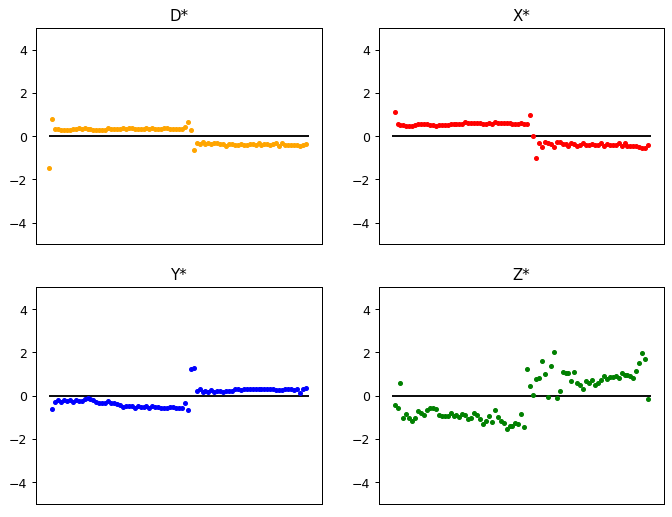

1_2


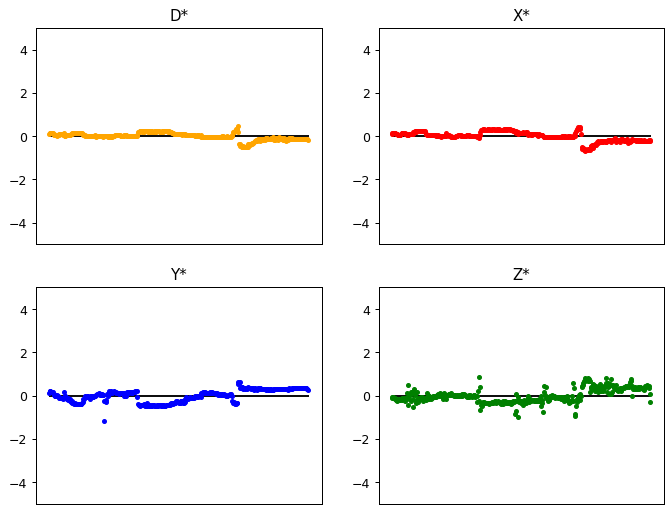

1_3


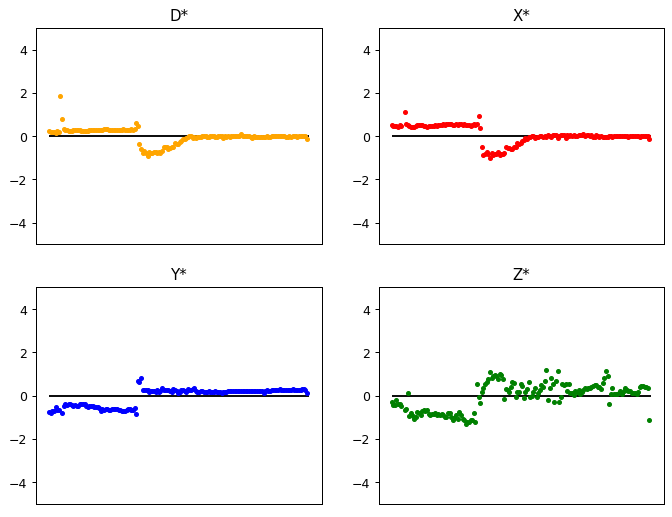

2_3


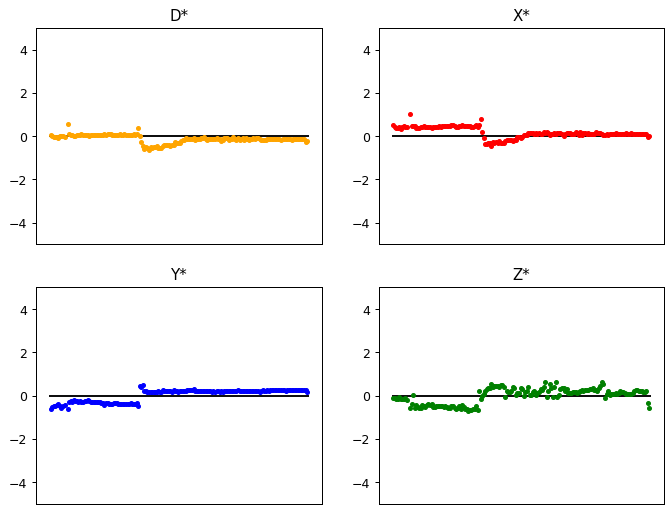

In [380]:
output2(file1_paths,5)

In [366]:
def scatter1(file_path):
    x, y, d = read_position_noZ(file_path)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    plt.scatter(x, y)
    plt.show()

Tag position Ex1
Distance(0 to 1)= 5.1161 m
Distance(0 to 2)= 10.0995 m
Distance(1 to 2)= 4.9982 m


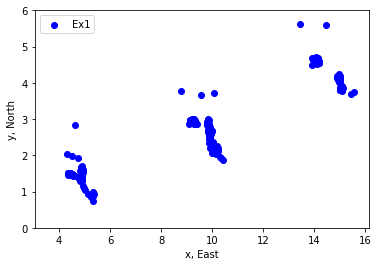

Tag position Ex2
Distance(0 to 1)= 4.8585 m
Distance(0 to 2)= 9.8001 m
Distance(1 to 2)= 4.9447 m


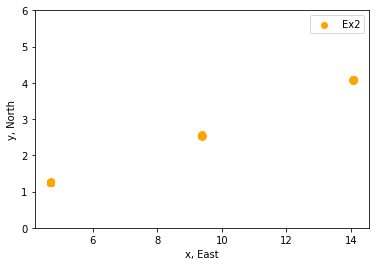

In [396]:
for file, title, col, label in zip([file1_paths, file2_paths],
                              ['Tag position Ex1', 'Tag position Ex2'],
                              ['b','orange'],
                              ['Ex1', 'Ex2']):
    x0, y0, d0 = read_position_noZ(file[0])
    x1, y1, d1 = read_position_noZ(file[1])
    x2, y2, d2 = read_position_noZ(file[2])

    mean_x = [np.mean(x0), np.mean(x1), np.mean(x2)]
    mean_y = [np.mean(y0), np.mean(y1), np.mean(y2)]

    d = [np.sqrt((mean_x[0] - mean_x[1])**2 + (mean_y[0] - mean_y[1])**2),
         np.sqrt((mean_x[2] - mean_x[0])**2 + (mean_y[2] - mean_y[0])**2),
         np.sqrt((mean_x[1] - mean_x[2])**2 + (mean_y[1] - mean_y[2])**2)]
    
    print(title)
    print('Distance(0 to 1)=','{:.04f}'.format(d[0]),'m')
    print('Distance(0 to 2)=','{:.04f}'.format(d[1]),'m')
    print('Distance(1 to 2)=','{:.04f}'.format(d[2]),'m')

    x = x0 + x1 + x2
    y = y0 + y1 + y2
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(0, 6)
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    plt.scatter(x, y, color=col,label=label)
    plt.legend()
    plt.show()

In [395]:
def output_graph_noZ(file_path, ylim):
    x=[]
    y=[]
    d=[]
    
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_d = np.mean(d)
    
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(9, 7), dpi=90)
    
    for ax, col, data, mean, name in zip(axes.ravel(), 
                                        ['orange','r','b'], 
                                        [d,x,y],
                                        [mean_d,mean_x,mean_y],
                                        ['D*','X*','Y*']):
        lmax = len(data)
        ax.set_title(name)
        ax.set_ylim(-ylim, ylim)
        ax.axes.xaxis.set_visible(False)
        ax.plot(data-mean, '.', color=col)
        ax.hlines([0], 0, lmax, "black")

0_1


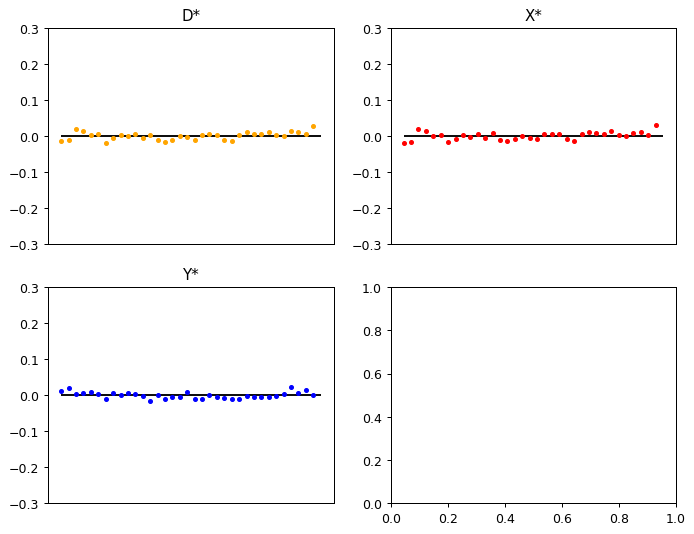

0_2


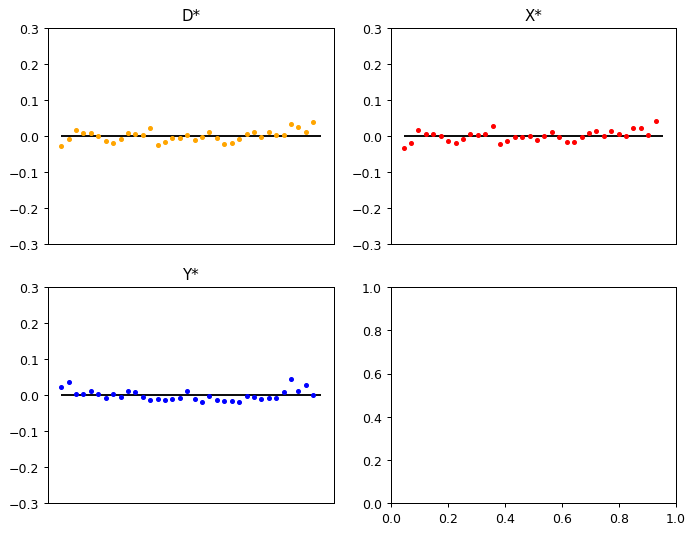

0_3


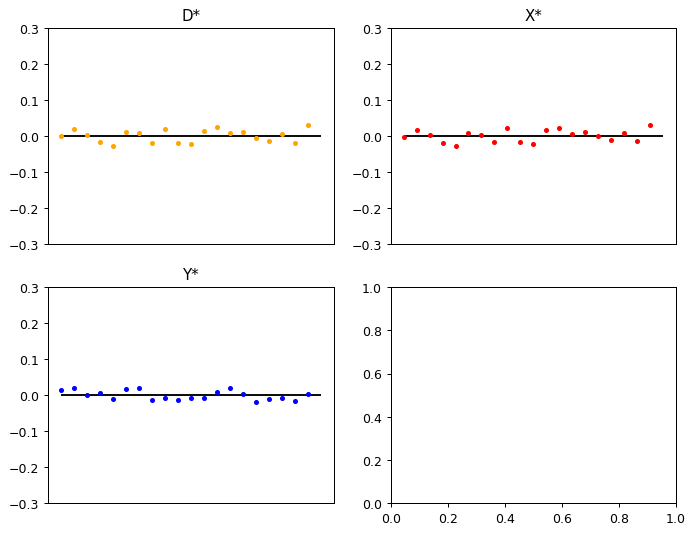

1_2


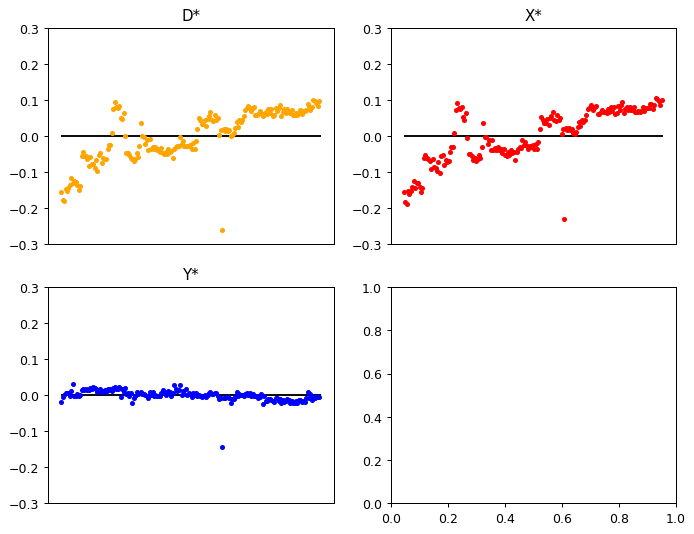

1_3


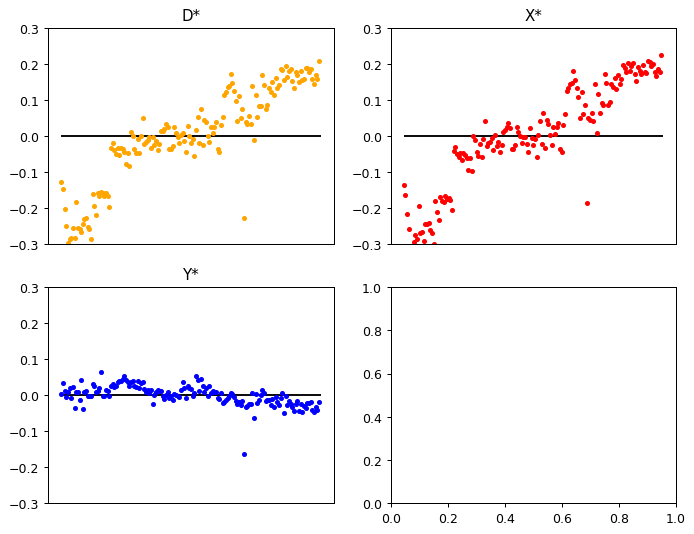

2_3


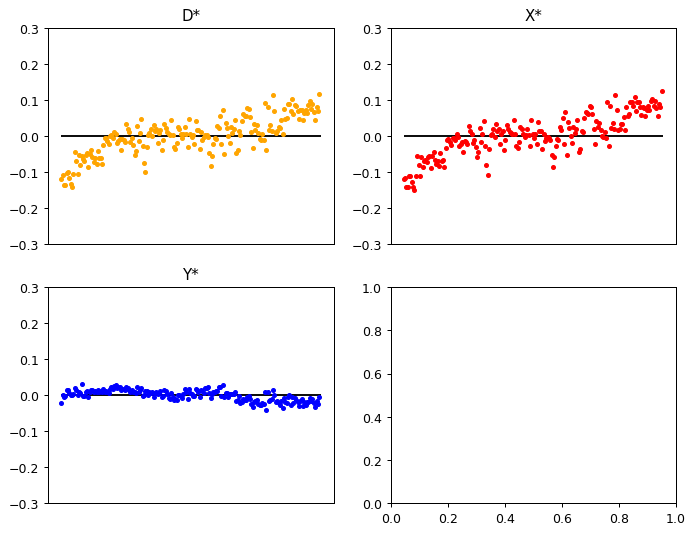

In [290]:
graphs2_noZ(file2_paths,0.3)